# Asymptotic solutions in long-times

Projectile motion in a non-homogenous potential field with drag is described by the equation

$$y_{\tau \tau} + \beta \epsilon y_{\tau} + \frac{1}{(1 + \epsilon y)^2} = 0,$$

with $y(0) = \epsilon$ and $y_{\tau}(0)=1$, and where $\epsilon \ll 1$ is expected.

In [1]:
import sympy as sym
from sympy import init_printing
init_printing(order='rev-lex') 

In [2]:
y, eps, a, b, tau, t, beta, gamma = sym.symbols('y, epsilon, a, b, tau, t, beta, gamma')
y0 = sym.Function('y0')(t)
y1 = sym.Function('y1')(t)
y2 = sym.Function('y2')(t)
y3 = sym.Function('y3')(t)
y4 = sym.Function('y4')(t)

In [3]:
y = sym.Eq(y0 + eps*y1 + eps**2*y2 + eps**3*y3 + eps**4*y4) # naive expansion

class f(sym.Function):
    
    @classmethod
    def eval(cls, y):
        return y.lhs.diff(t,t) + beta*eps*y.lhs.diff(t)**2 + 1/(1 + eps*y.lhs)**2
        #return y.lhs.diff(tau, tau) + eps/y.lhs**2
y

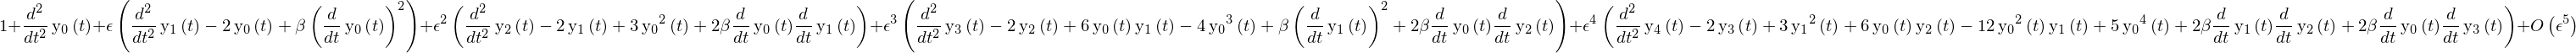

In [4]:
the_series = sym.series(f(y), eps, x0=0, n=5)
by_order = sym.collect(the_series, eps, evaluate=False)
the_series

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

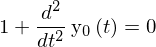

In [5]:
sym.Eq(by_order[1].removeO())

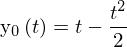

In [6]:
eqn = sym.Eq(by_order[1].removeO())    #1 + y0(tau).diff(tau, tau))
soln0 = sym.dsolve(eqn, y0)
constants = sym.solve([soln0.rhs.subs(t,0) - 0, \
                      soln0.rhs.diff(t).subs(t,0) - 1])
C1, C2 = sym.symbols('C1 C2')
soln0 = soln0.subs(constants)
soln0

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

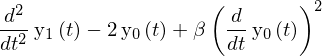

In [7]:
by_order[eps]

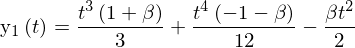

In [8]:
try:
    eqn = sym.Eq(by_order[eps].replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps])
    
soln1 = sym.dsolve(eqn, y1)
constants = sym.solve([soln1.rhs.subs(t,0) - 0, \
                      soln1.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln1 = soln1.subs(constants)
soln1


### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

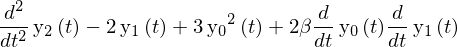

In [9]:
by_order[eps**2]

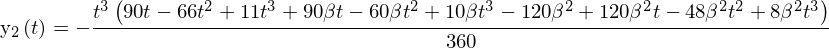

In [10]:
try:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**2].replace(y1, soln1.rhs))
    
soln2 = sym.dsolve(eqn, y2)
constants = sym.solve([soln2.rhs.subs(t,0) - 0, \
                      soln2.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln2 = soln2.subs(constants)
sym.factor(soln2)

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

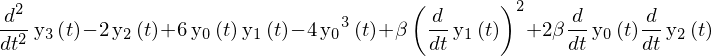

In [11]:
by_order[eps**3]

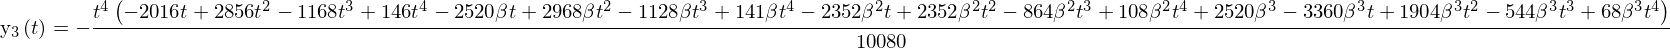

In [12]:
try:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**3].replace(y2, soln2.rhs))
    
soln3 = sym.dsolve(eqn, y3)
constants = sym.solve([soln3.rhs.subs(t,0) - 0, \
                      soln3.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln3 = soln3.subs(constants)
sym.factor(soln3)

### $\mathcal{O} \left( \epsilon^4 \right) \mbox{Solution}$

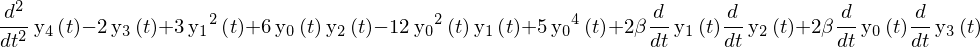

In [13]:
by_order[eps**4]

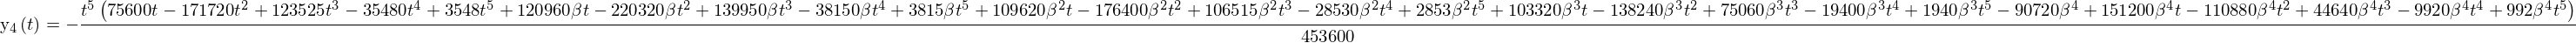

In [14]:
try:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs).replace(
        y2, soln2.rhs).replace(y1, soln1.rhs).replace(y0, soln0.rhs))
except NameError:
    eqn = sym.Eq(by_order[eps**4].replace(y3, soln3.rhs))
    
soln4 = sym.dsolve(eqn, y4)
constants = sym.solve([soln4.rhs.subs(t,0) - 0, \
                      soln4.rhs.diff(t,1).subs(t,0) - 0])
C1, C2 = sym.symbols('C1 C2')
soln4 = soln4.subs(constants)
sym.factor(soln4)

### $\mbox{Composite Solution}$

epsilon**4*(-0.00782733896808962*t**10 + 0.0782733896808962*t**9 - 0.272522073463864*t**8 + 0.378887307246437*t**7 - 0.16684010216678*t**6 + 3.570125e-14*t**5) + epsilon**3*(-0.0144932237746701*t**8 + 0.115945790197361*t**7 - 0.283524820857429*t**6 + 0.200162598674875*t**5 - 6.865625e-11*t**4) + epsilon**2*(-0.0305736205*t**6 + 0.183441723*t**5 - 0.250162640833333*t**4 + 1.40833333333333e-7*t**3) + epsilon*(-0.0833875*t**4 + 0.33355*t**3 - 0.000325*t**2) - t**2/2 + t


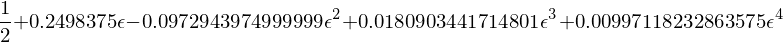

In [15]:
y_comp = sym.symbols('y_{comp}', cls=sym.Function)
try:
    y_comp = sym.Eq(y_comp, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y_comp = sym.Eq(y_comp, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
    
#print(sym.latex(y_comp))
print(str(y_comp.rhs.subs(beta,6.5E-4)))
y_comp.rhs.subs(beta,6.5E-4).subs(t, 1)

### $\mbox{The Trajectory}$

In [16]:
def savefig(filename, pics):
    if pics == True:
        plt.savefig('../doc/figures/{}.png'.format(filename), bbox_inches='tight', dpi=400)
    else:
        pass
pics = True

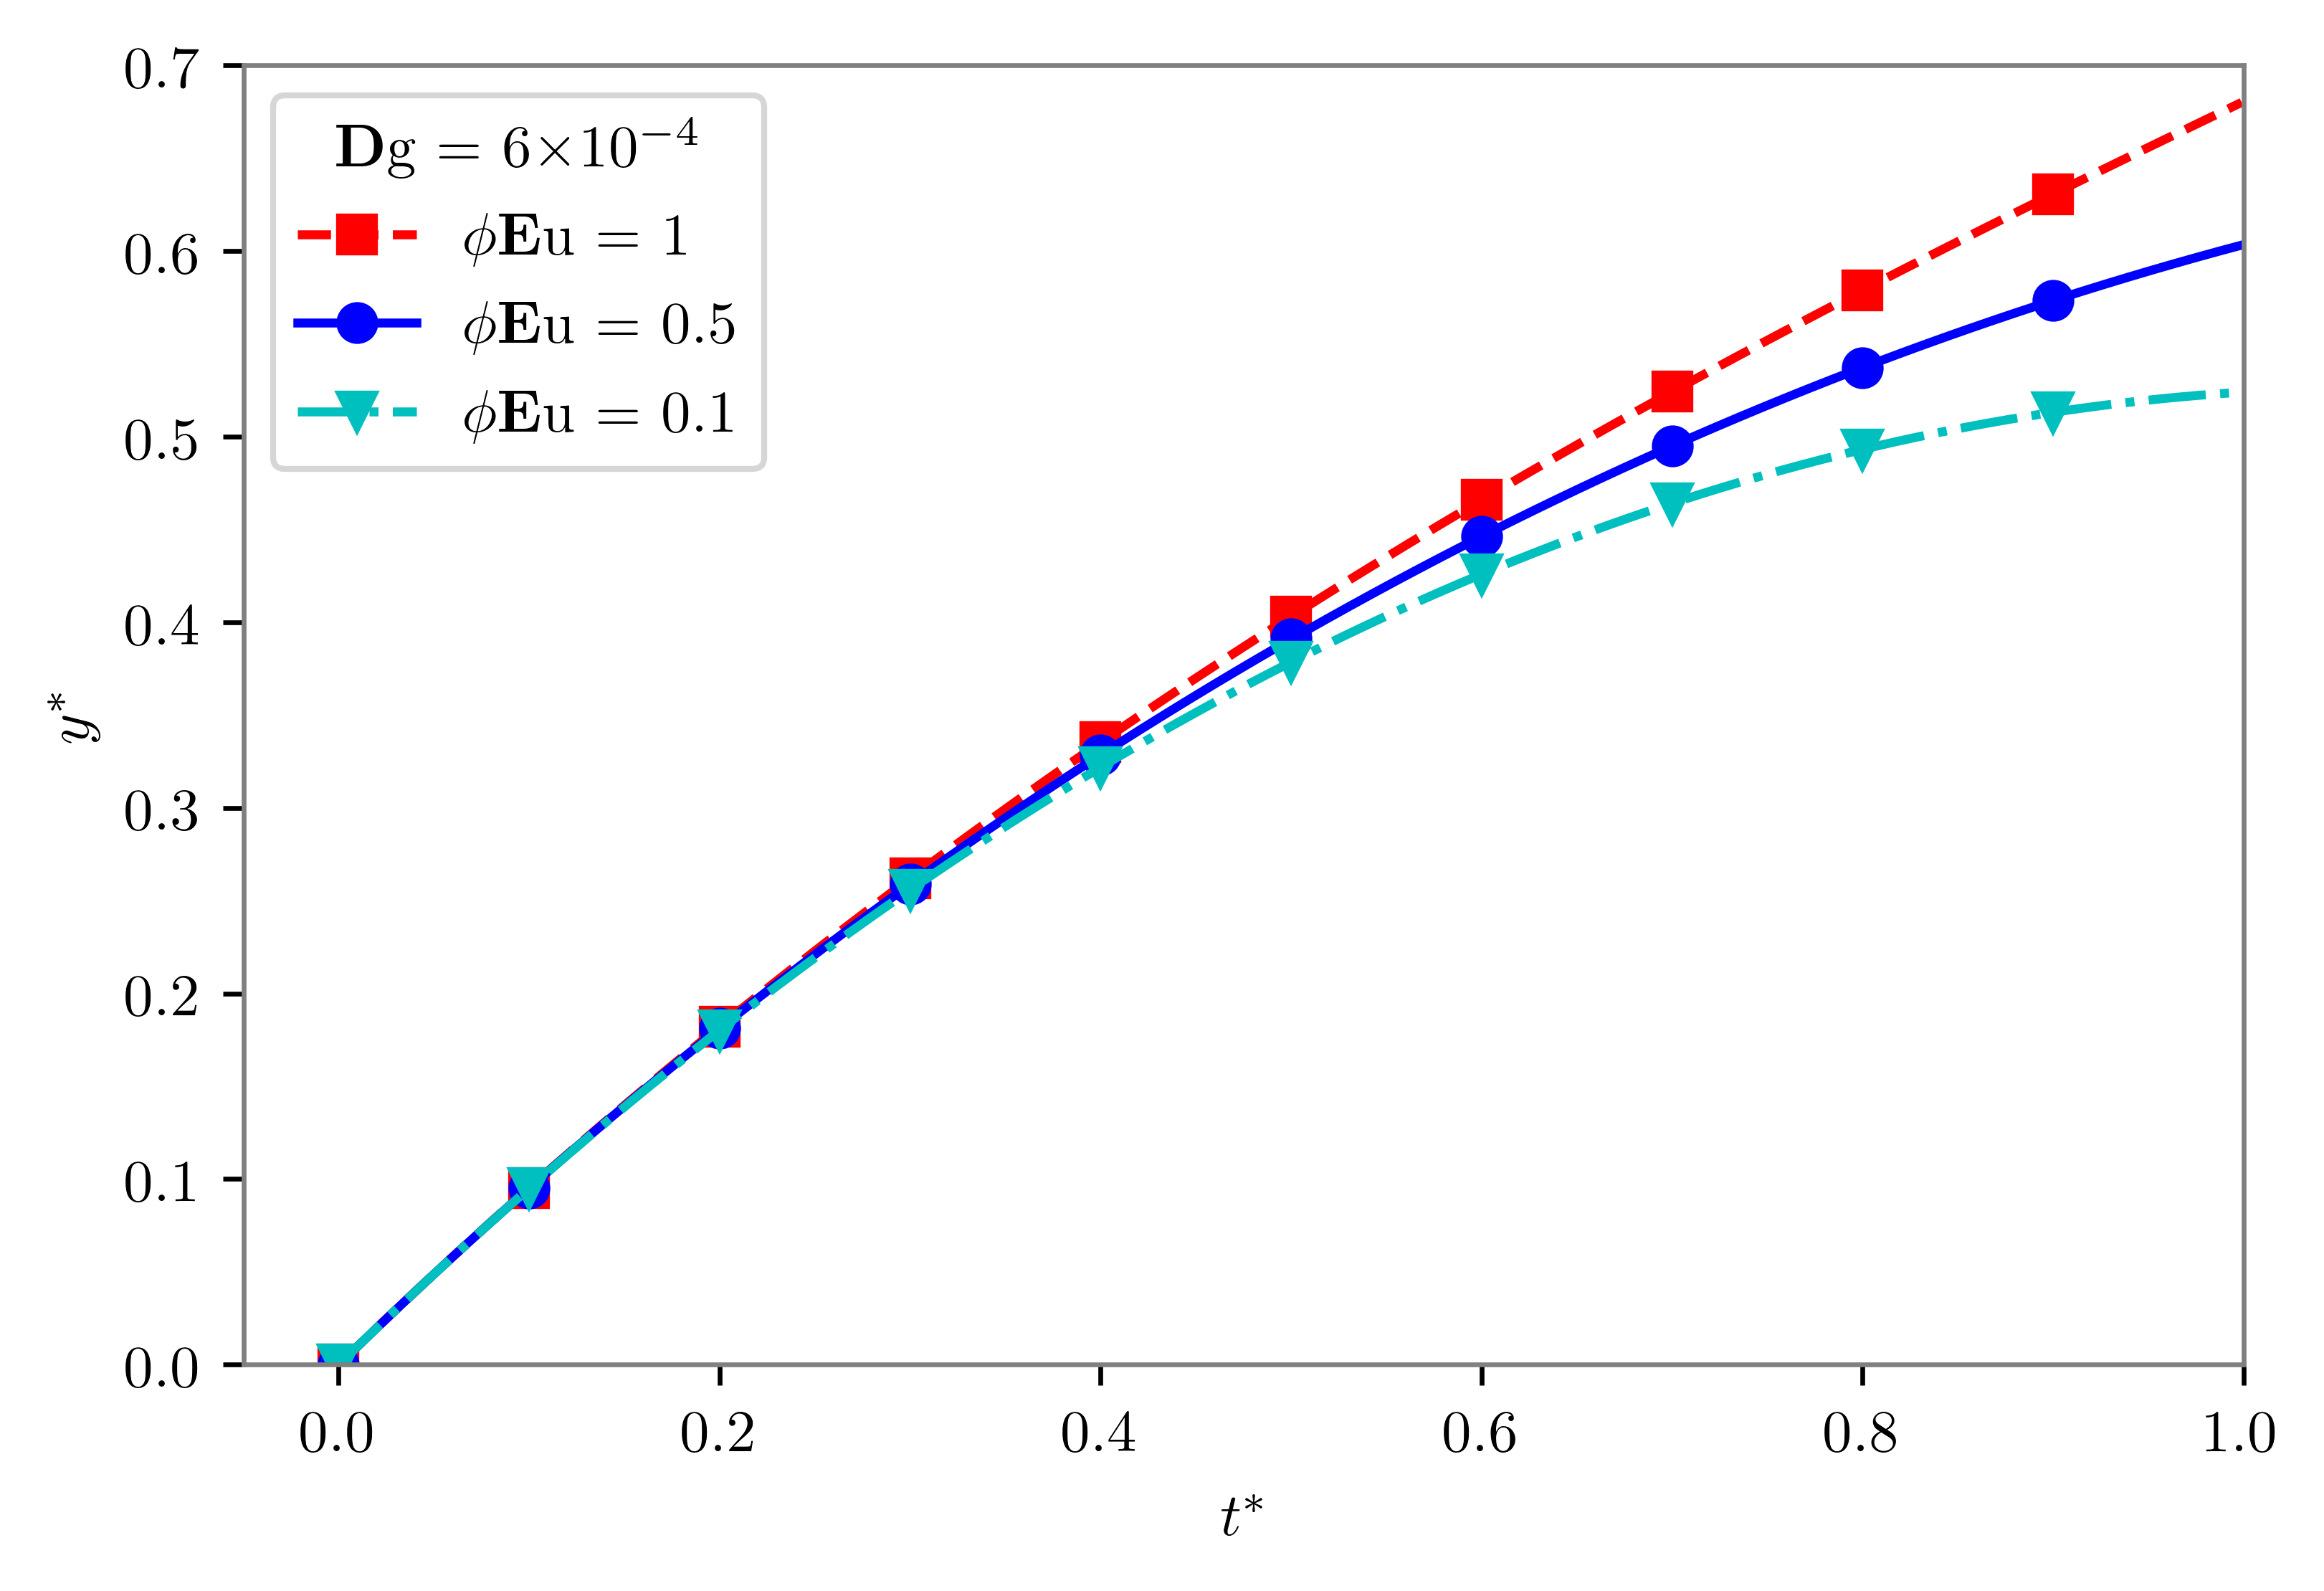

In [18]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp

%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['figure.dpi'] = 300
matplotlib.rcParams.update(
{   'text.color': 'k',
    'xtick.color': 'k',
    'ytick.color': 'k',
    'axes.labelcolor': 'k'
})

eps_val = [.1, .5, 1.][::-1]
linestyle = ['rs--', 'bo-', 'cv-.', 'k+:', 'm']
tt = sp.arange(0,1,0.001)
bet = 6.5E-4
plt.figure(figsize=(6, 4))#, dpi=100)
for keys, vals in enumerate(eps_val):
    y_compP = sym.lambdify(t, y_comp.rhs.subs(eps, vals).subs(beta, bet), 'numpy')
    plt.plot(tt, y_compP(tt), linestyle[keys],label=r'$\phi \mathbf{E}\mbox{u}$'+ ' = {}'.format(vals).rstrip('0').rstrip('.')
             , markevery=100)

plt.ylim(ymin=0., ymax=0.7)
plt.xlim(xmax=1)
plt.ylabel(r'$y^*$')
plt.xlabel(r'$t^*$')
plt.legend(title = r'$\mathbf{D}\mbox{g}$' +' = {:1.0E}'.format(bet)[:-4] + r'$\times 10^{-4}$')
savefig('long_times',pics)
plt.show()

## Time aloft

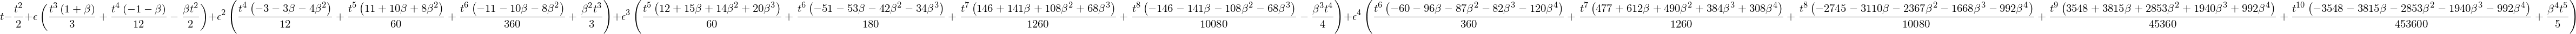

In [19]:
y2 = sym.symbols('y2', cls=sym.Function)
y2 = sym.Function('y2')(t)
try:
    y2 = sym.Eq(y2, soln0.rhs + eps*soln1.rhs + eps**2*soln2.rhs 
                + eps**3*soln3.rhs + eps**4*soln4.rhs) # + eps**2*soln2.rhs)
except NameError:
    y2 = sym.Eq(y2, eps*soln1.rhs + eps**2*soln2.rhs + eps**3*soln3.rhs + eps**4*soln4.rhs)
y2.rhs
#y2.diff(t)

In [20]:
tau0, tau1, tau2, tau3 = sym.symbols('tau0 tau1 tau2 tau3')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2 + eps**3*tau3)
y3 = y2.rhs.subs(t, tau.lhs).series(eps)
col = sym.collect(y3, eps, evaluate=False)

### $\mathcal{O} \left( 1 \right) \mbox{Solution}$

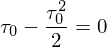

In [21]:
#tau0 = 2
sym.Eq(col[1].removeO())

Two roots, lets look at $\tau_0 = 2$.

### $\mathcal{O} \left( \epsilon \right) \mbox{Solution}$

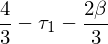

In [22]:
order_eps = col[eps].subs(tau0, 2)
order_eps 

In [23]:
soln_eps = sym.solve(order_eps, tau1)

### $\mathcal{O} \left( \epsilon^2 \right) \mbox{Solution}$

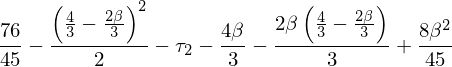

In [24]:
order_eps2 = col[eps**2].subs(tau0, 2).subs(tau1, soln_eps[0])
order_eps2

In [25]:
soln_eps2 = sym.solve(order_eps2, tau2)

### $\mathcal{O} \left( \epsilon^3 \right) \mbox{Solution}$

In [26]:
order_eps3 = col[eps**3].subs(tau0, 2).subs(tau1, soln_eps[0]).subs(tau2, soln_eps2[0])
order_eps3
soln_eps3 = sym.solve(order_eps3, tau3)

### Composite solution

2.94 + 1.959412 \epsilon + 1.17482421168 \epsilon^{2} + 0.67065668534928 \epsilon^{3}


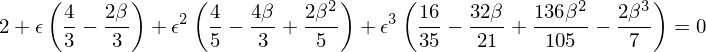

In [27]:
tau0, tau1, tau2, tau3 = sym.symbols('tau0 tau1 tau2 tau3')
tau = sym.Eq(tau0 + eps*tau1 + eps**2*tau2 + eps**3*tau3)
tau = tau.subs(tau0, 2).subs(tau1, soln_eps[0]).subs(tau2, soln_eps2[0]).subs(tau3, soln_eps3[0])
print(sym.latex(tau.subs(beta, 6E-4).lhs*1.47))
tau

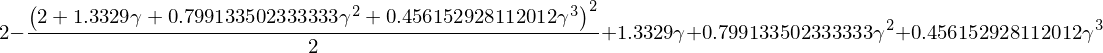

In [28]:
a=y_comp.rhs.subs(t, tau.lhs.subs(eps, gamma)).subs(beta,6.5E-4)
(sym.collect(a, eps, evaluate=False)[1])

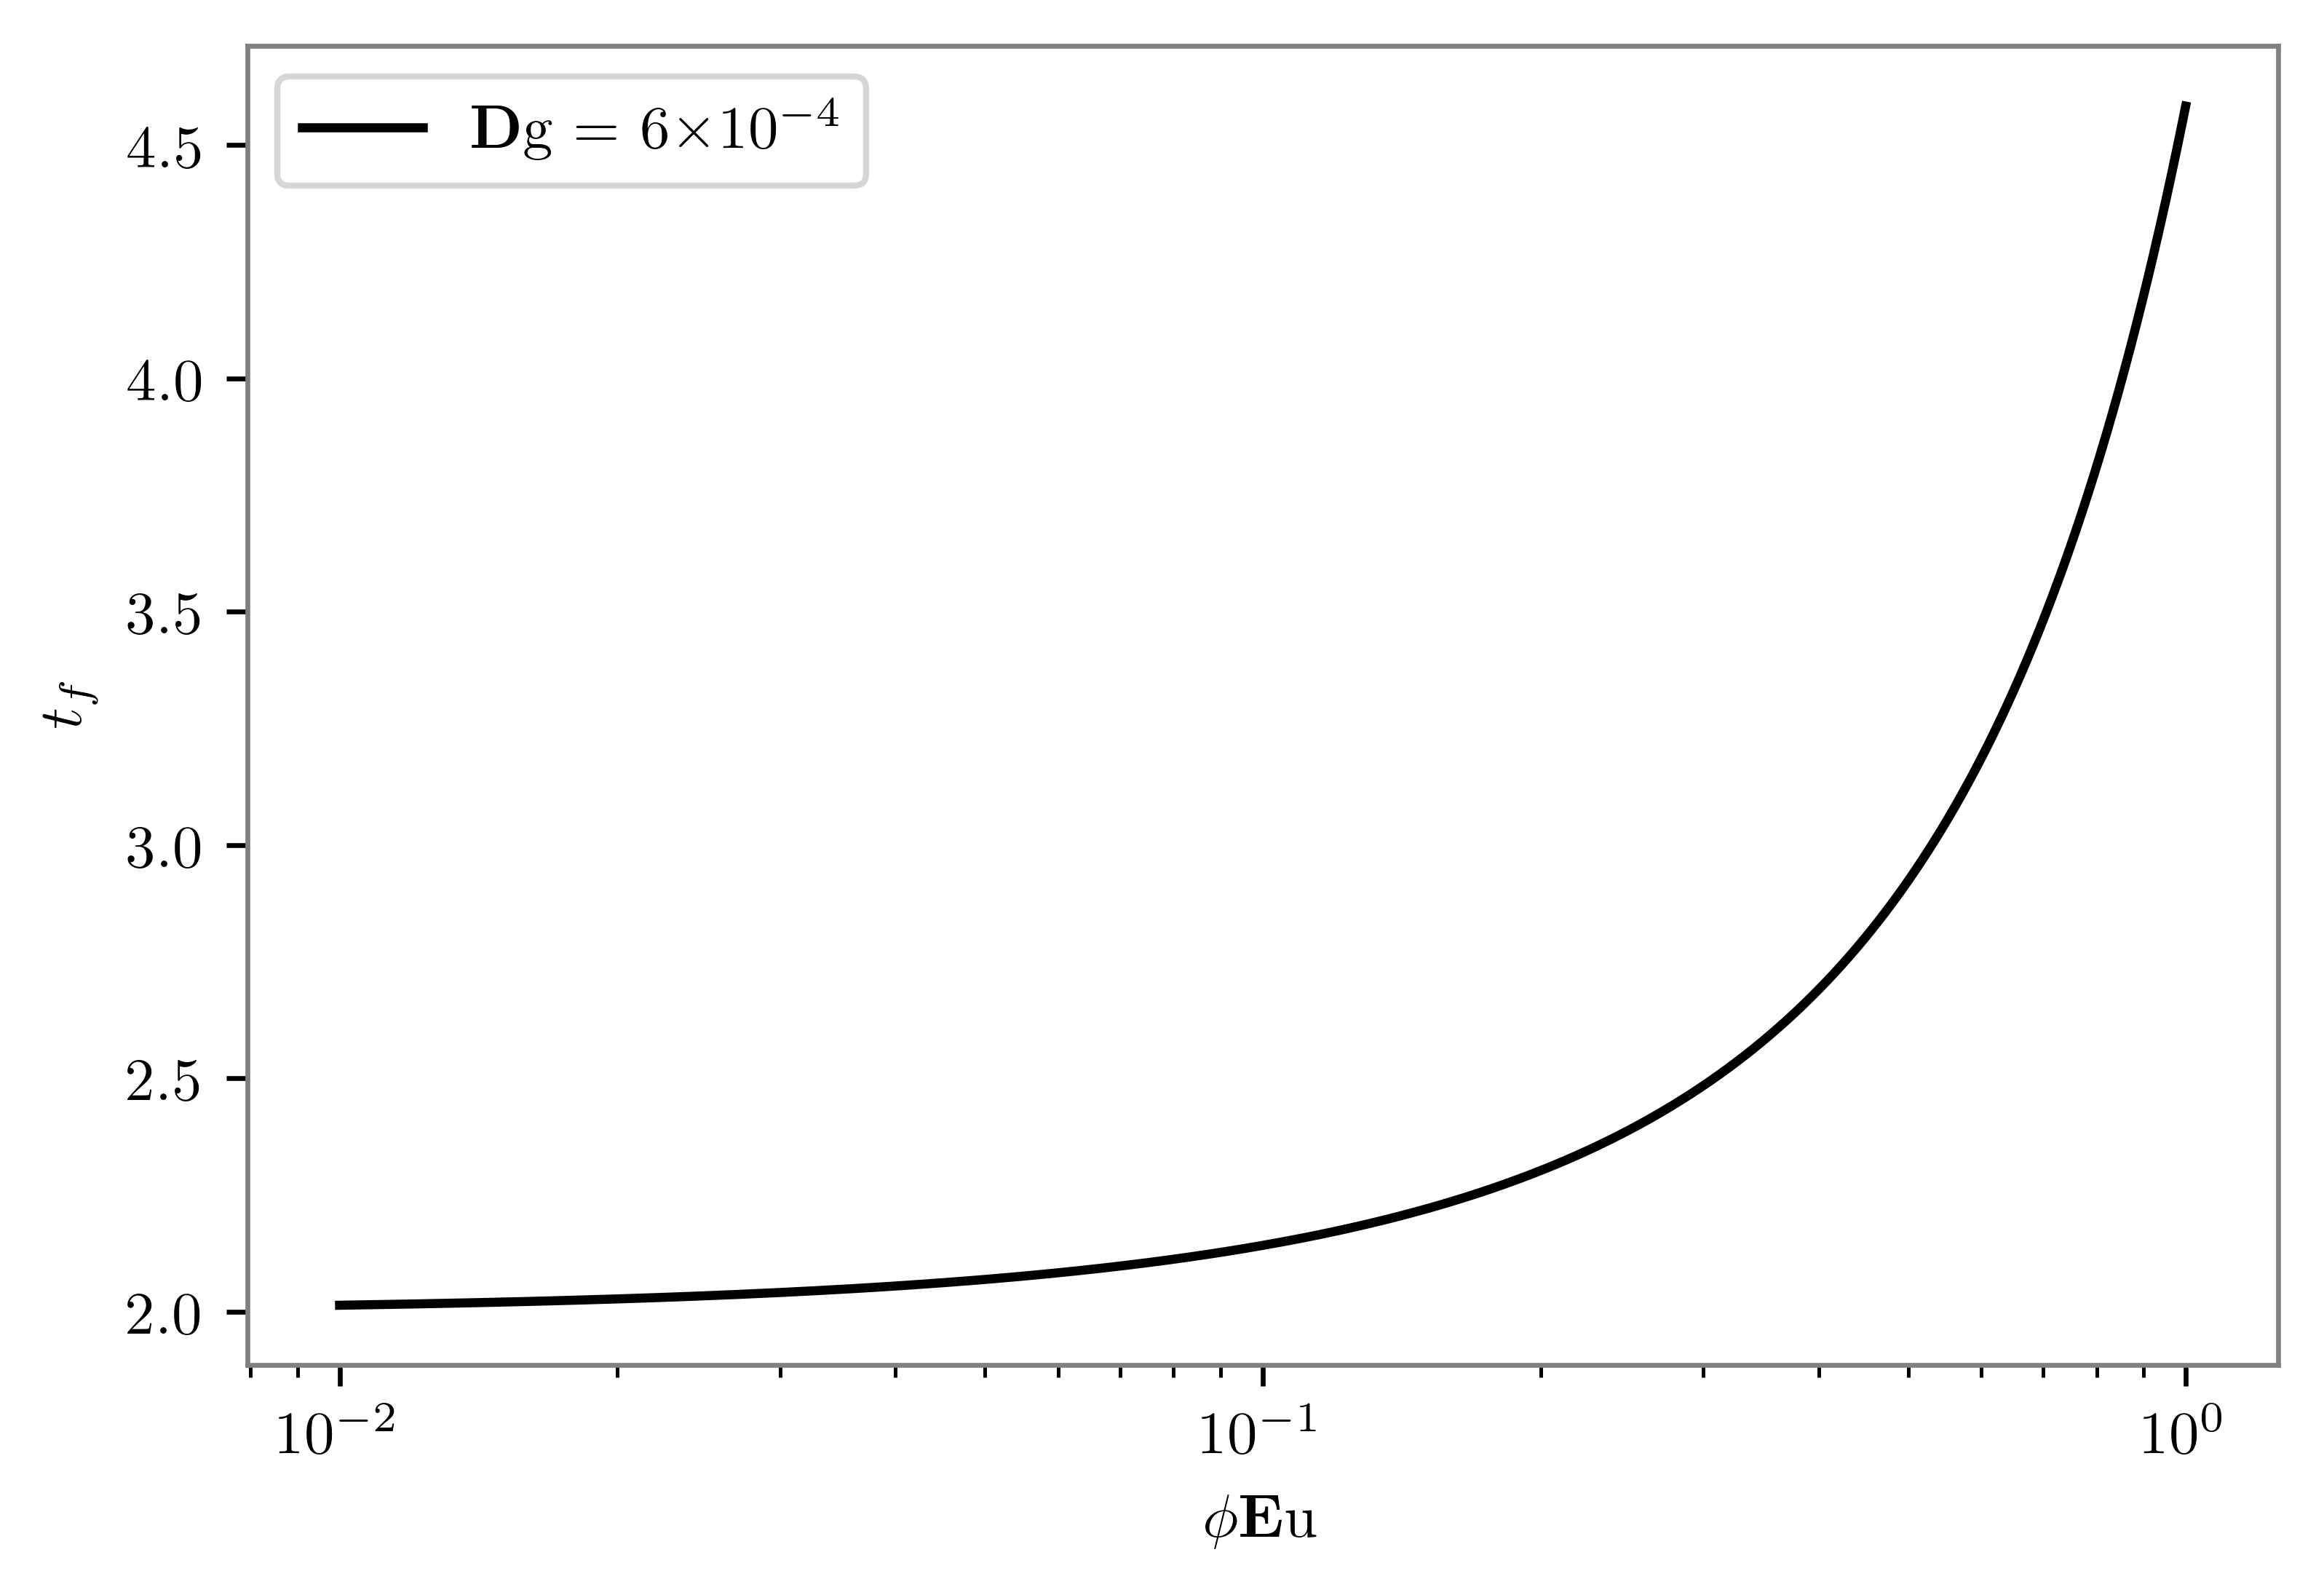

In [29]:
ttt = np.arange(0.01, 1,0.001)
betas = [bet]
linestyle = ['k','k--', 'bo-', 'cv-.', 'k+:', 'm']
plt.figure(figsize=(6, 4))#, dpi=100)
for keys, vals in enumerate(betas):
    taun = tau.subs(beta, vals)
    tau_soln = sym.lambdify(eps, taun.lhs, 'numpy')
    label=['{:1.0E}'.format(vals)[:-4] + r'$\times 10^{-4}$']
    plt.semilogx(ttt, tau_soln(ttt), linestyle[keys], 
                 label=r'$\mathbf{D}\mbox{g}$ = '+ label[keys], markevery=100)
plt.xlabel(r'$\phi \mathbf{E}\mbox{u}$')
plt.ylabel(r'$t_f$')
plt.legend()
savefig('drag', pics)
plt.show();

## Drag vs. inertia

In [30]:
t, V = sym.symbols('t V', real=True, positive=True)
u = sym.symbols('u', cls=sym.Function)
eq = sym.diff(u(t), t) + u(t)**2
sol = sym.dsolve(eq, u(t))
print(sol.rhs)
u = sol.rhs

1/(C1 + t)


In [31]:
C1, C2 = sym.symbols('C1 C2')
eq = sym.Eq(u.subs(t, 0), 1)
sol = sym.solve(eq, C1)[0]
print(sol)
print(u.subs(C1, sol))

1
1/(t + 1)


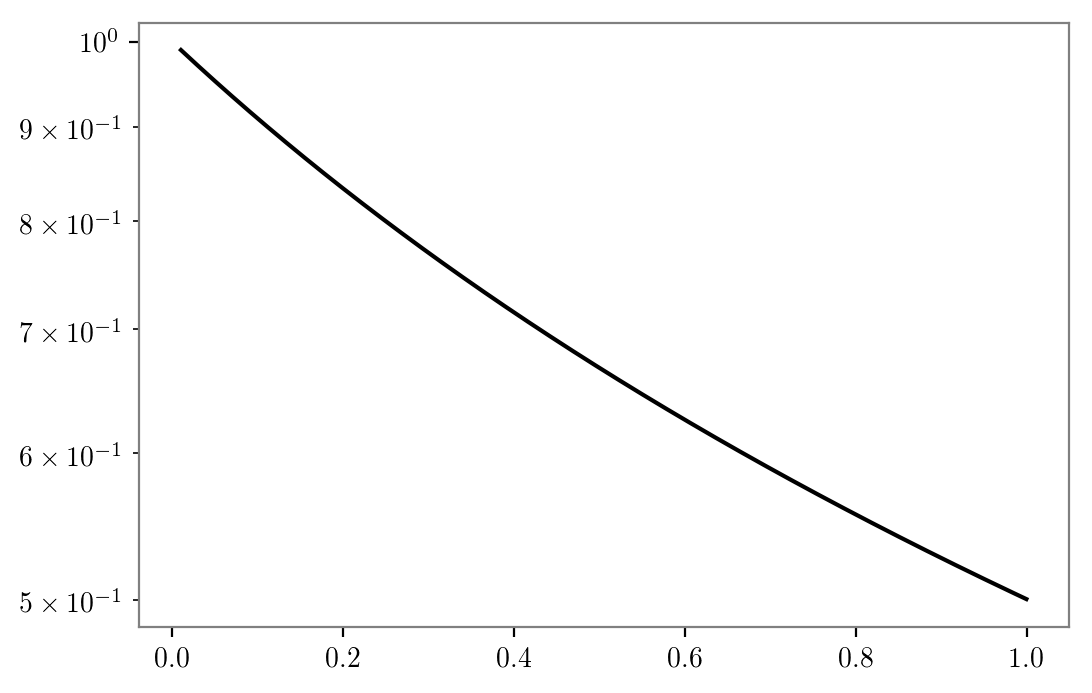

In [32]:
tt = np.arange(0.01,1.,0.001)
plt.figure(figsize=(6, 4), dpi=100)
u_soln = sym.lambdify(t, u.subs(C1, sol).subs(V,1.), 'numpy')
plt.semilogy(tt, u_soln(tt), 'k')
plt.show();